# StepFunctions

## Overview

é um serviço low-code usado para orquestrar serviços AWS, automatizar processos de negócios e contrução de apĺicações serverless.

*   tem como benefícios de uso:

    *   rastreio do processo como um todo.

    *   rastreio de inputs/outputs ao longo de toda a cadeia.

    *   em casos de quebras, somente a parte problemática precisa ser reexecutada, dado que o Application State é mantido, fazendo o rastreio das etapas e salvando seus Event Logs entre os componentes da aplicação.

o Workflow Studio apresenta limitações como:

*   **não suporta a criação de IDs (ARN) dinâmicos para recursos**

*   **um token de tarefa (task token) não é adicionado à definição de State quando você seleciona Wait for callback no Workflow Studio**. Você pode adicioná-lo manualmente no snippet de código geral.

StepFunctions funciona por meio de chamadas de API de um serviço para outro tomando como exemplo:

```json
{
    "Comment":"Exemplo de uso de API dentro de StepFunctions",
    "StartAt":"Glue Job Invoke"
    "States":{
        "Glue Job Invoke":{
            "Type":"Task",
            "Resource":"arn:aws:states:::glue:startJob.sync",
            "Parameters":{
                "JobName":"MyGlueJob",
                "Arguments":{
                    "--Nome":"Victor"
                }
            },
            "End":true
        }
    }
}
```

como podemos ver, em "Resource" selecionamos a API e o método da mesma que temos interesse em utilizar e em "Parameters" definimos quais os valores que devemos passar a esta API para termos o processo executado corretamente

**de uma forma sucinta, curta e simples: StepFunctions nos permite integrar serviços AWS (Service Tasks) por meio do consumo de suas API's de modo mais simplificado ou ainda fazer uso de serviços externos (Activity Tasks) incorporando-os ao fluxo de processos e etapas desejado, com maior rastreabilidade e governança do processo, tudo isso por meio de uma interface gráfica simples e robusta**

## Características

### Automatic Scaling

aplicações em Step Functions escalam de modo automático e quando necessário, já que são serverless

### High Availability

tem tolerância a falhas de modo nativo

disponivel em multiplas Availability Zones (AZ) em cada região, protegendo as aplicações em casos de falhas individuais de maquinas e/ou data centers

### Pay Per Use

sua cobrança varia de acordo com o tipo de State Machine/Workflow

no caso de um **Standard**, a cobrança é feita mediante ao **número de Transitions**, contabilizado ao fim de cada State

no caso de um **Express**, é cobrado pelo **número de vezes que é executado**, duração e consumo de memória

### Security & Compliance

integrada com o IAM

**recomendado uma IAM Policy menos privilegiada para todos os recursos presentes na State Machine/workflow**

podemos acessar a Step Functions por meio de uma VPC e outros serviços sem necessitar navegar na internet publica usando AWS PrivateLink

**para a execução em resources da AWS, o IAM Role ou IAM User em questão devem ter permissão definida via IAM Policy para tal**

## Tipos de State Machines/Workflows

ambos podem ser engatilhados por eventos como um HTTP request usando Amazon API Gateway, IoT rules ou uma EventBridge event source

uma comparação breve pode ser observada na imagem a seguir:

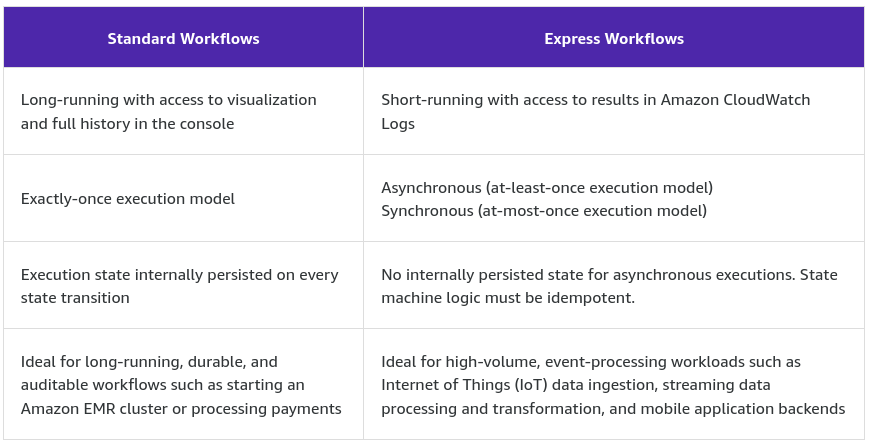

### Standard

**tipo padrão de uma State Machine**

ideais em situações que se necessita de um **workflow durável, auditável e longa execução**

podem ser inspecionadas pelo AWS CloudWatch Logs ao ligar a opção de logs

duração máxima: 1 ano

workflow run start rate: mais de 2,000 por segundo

start transition rate: mais de 4,000 por segundo por conta

tem suporte a StepFunctions Activities

suporta todos serviços de integração e padrões

sua semântica é do tipo exactly-one workflow run

**maior latência**

**menor custo por Transition**

### Express

ideais em situações em que se necessita de **processamento de alto volume de dados, processamento e transformação de dados em streaming, cargas de processamento de eventos (event-processing workloads), aplicações mobile de Backend**

seu histórico não é salvo dentro de AWS StepFunctions

podemos configurar o AWS CloudWatch Logs para registro de seus logs

duração máxima: 5 minutos

workflow run start rate: mais de 100,000 por segundo

start transition rate: quase ilimitado

não suporta StepFunctions Activities

**menor latência**

**maior custo por Transition**

suporta todos os serviços de integração mas não suporta os padrões Job-run (.sync) ou Callback (.waitForTaskToken)

sua semântica depende se o workflow é do tipo assíncrono ou síncrono:

1.  síncrono: at-most-once workflow run

2.  assíncrono: at-least-once workflow run

exemplos:

*   ingestão de dados de IoT

#### 2 tipos

##### Síncrono

espera a finalização de um workflow para retornar o resultado

pode ser usado para orquestração de microsserviços, iniciação de tasks paralelas, desenvolvimento de aplicações sem a necessidade de desenvolvimento de código adicional para lidar com erros

podem ser invocadas por Amazon API Gateway, AWS Lambda ou via StartSyncExecution API

##### Assíncrono

retorna a confirmação de que o workflow começou a ser iniciado mas não espera por sua completude

podem ser usados em situações onde não precisa de uma resposta imediata do output

podem ser iniciadas em resposta a um evento aninhado em uma StepFunction ou usando StartExecution API Call

## IAM Policies para AWS StepFunctions

as IAM Policies pré-definidas para Step Functions são:

### AWSStepFunctionsConsoleFullAccess

**provê acesso ao Console para o user/role**

para um acesso completo é necessário, o IAM User precisa de permissão "iam:PassRole" em outros IAM Roles que podem ser assumidos por este serviço

permissões que compõe esta IAM Policy:

*   "states:*"

*   "iam:ListRoles"

*   "iam:PassRole"

*   "lambda:ListFunctions"

### AWSStepFunctionsReadOnlyAccess

**permite somente a leitura das StepFunctions**

atrela as seguintes permissões:

*   "states:ListStateMachines"

*   "states:ListActivities"

*   "states:DescribeStateMachine"

*   "states:DescribeStateMachineForExecution"

*   "states:ListExecutions"

*   "states:DescribeExecution"

*   "states:GetExecutionHistory"

*   "states:DescribeActivity"

### AWSStepFunctionsFullAccess

**permite ao user/role acesso a API da AWS StepFunctions**

tem somente uma permissão em sua composição:

*   "states:*"

## Serverless

são ferramentas que **não necessitam de provisionamento ou gerencimento de servidores**.

**ferramentas serverless eliminam a necessidade de gerenciamento de infraestrutura**.

**são escaláveis de modo automático, grande disponibilidade interna e seu custeio é pay-as-you-go**

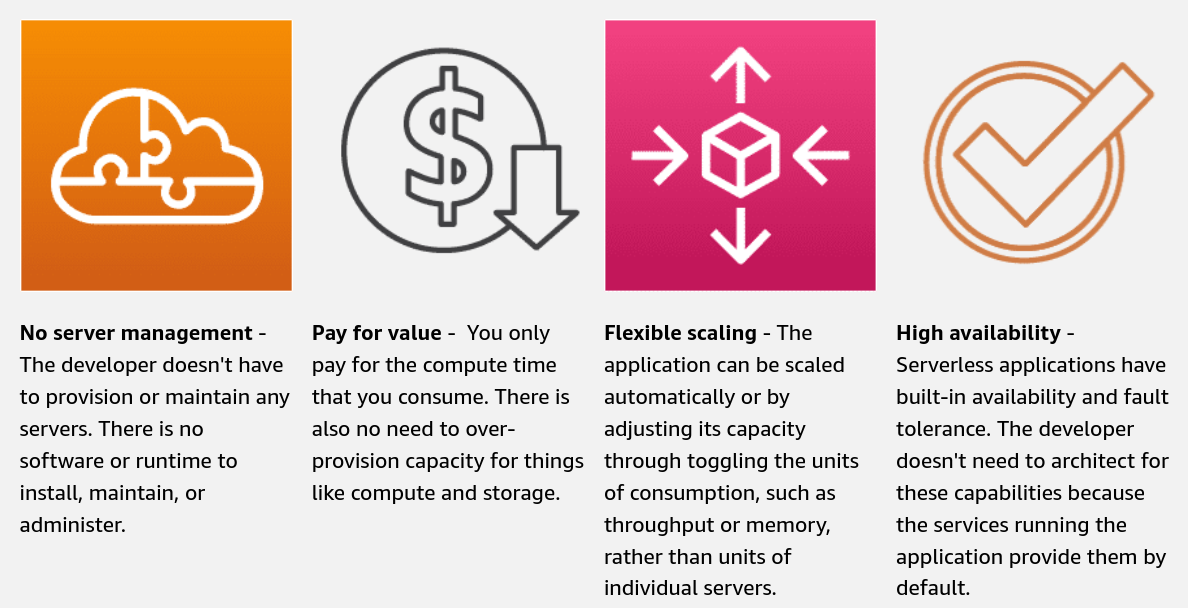

alguns dos serviços serverless da AWS são:

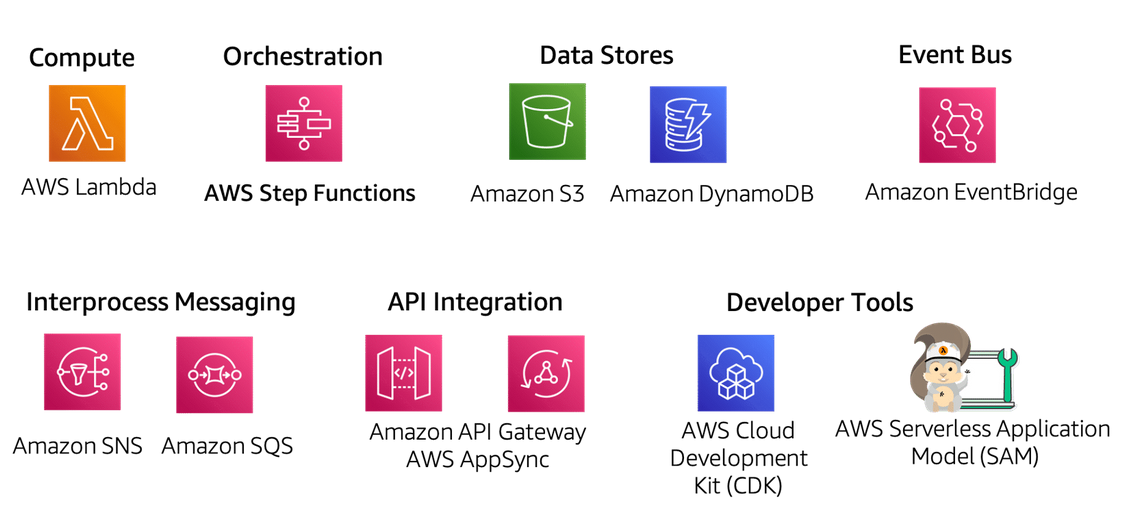

## Componentes

### State Machines

se trata de um workflow, isto é, um **conjunto de processos (States)** em formato de fluxo

### States

cada etapa de um workflow é um State

é referido a ele pelo seu proprio nome especificado em sua definição

algumas das funcionalidades de States são:

*   executar trabalho na State Machine;

*   realizar condicionais, gerando, por exemplo, branches

*   parar a execução em casos de falha ou sucesso

*   transmitir inputs e outputs de cada etapa

*   gerar um delay entre etapas

*   realizar paralelismo de tasks

*   fazer iterações de modo dinâmico

existem 8 tipos de States:

1.  **Pass State**: realiza a transmissão de dados sem realizar alterações. uteis em situações onde deseja-se debugar ou criar uma State Machine

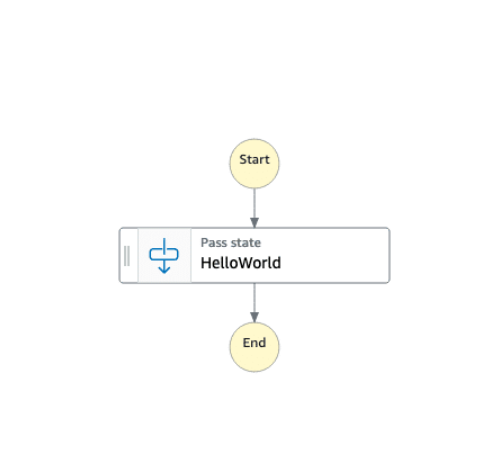

2.  **Task State**: representa uma unidade de trabalho executada pela State Machine. realiza a execução de recursos

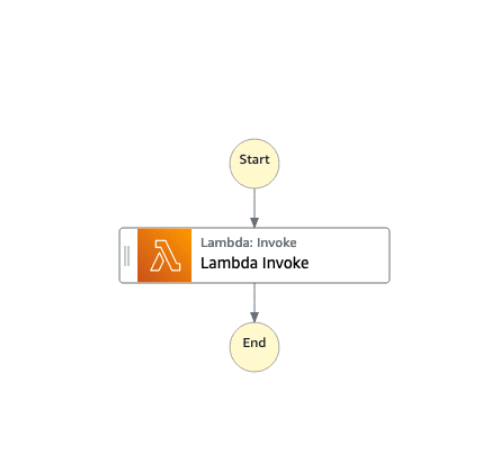

3.  **Choice State**: realiza a implementação de condicionais de modo que o processo seguinte depende do input do Choice State

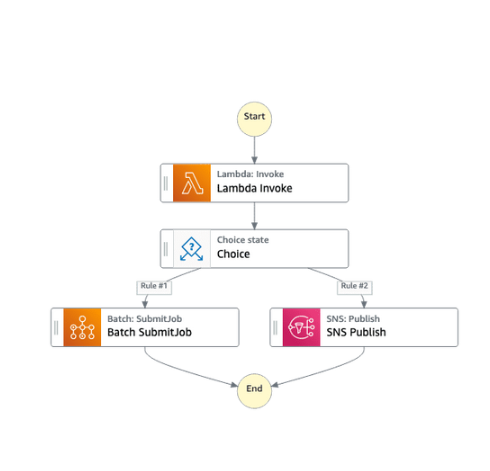

4.  **Wait State**: realiza a implementação de delays, permitindo escolher tempos relativos ou absolutos, expressos em timestamp

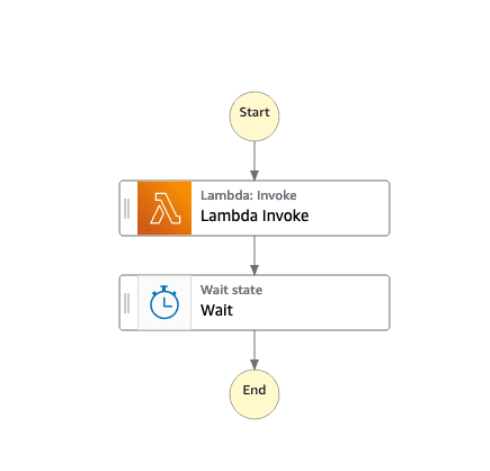

5.  **Succeed State**: encerra as atividades da State Machine. uteis, por exemplo, em conjunto de Choice States que so tem como função encerra a execução da State Machine.

    *   não possuem "Next" ou "End", já que é terminal

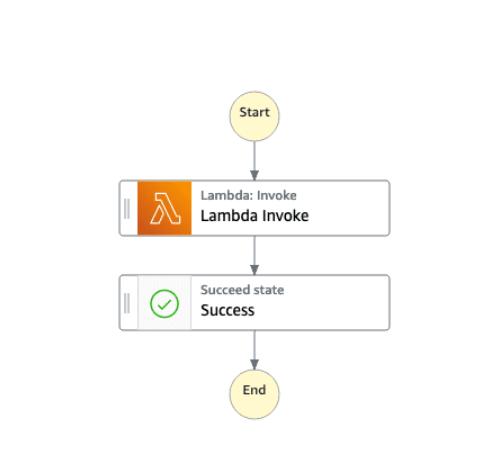

6.  **Fail State**: encerra a atividade da State Machine e a marca como Failure, ao menos que haja um "Catch" que dê continuidade da execução
    
    *   não possuem "Next" ou "End", já que é terminal

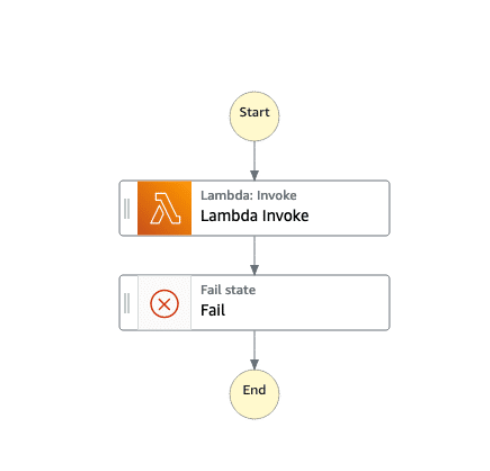

7.  **Parallel State**: permite a execução de branches de modo paralelo

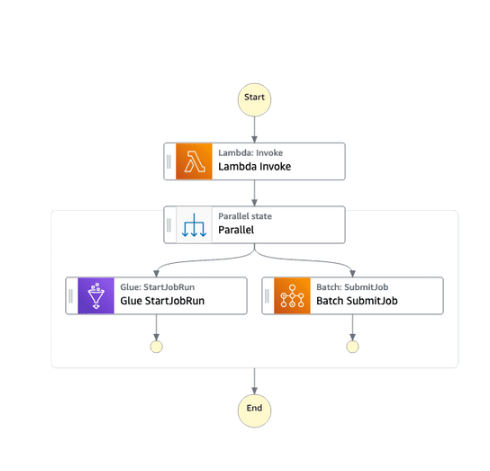

8.  **Map State**: análogo ao map de pandas. ele executa operações elemento por elemento de uma Array passada como argumento

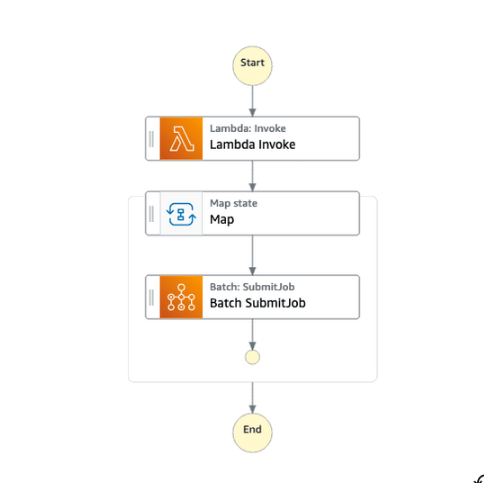

### Transitions

**fazem a conexão dos States**

definida pelo field **"Next"**

**todos States que não são terminais devem conter "Next"** com exceção de Choice States

**"Next" tem como valor o nome de um State no formato de String**

## Ferramentas de Desenvolvimento

### Workflow Studio

modo mais trivial de elaboração de State Machines

**se trata da UI**

#### Limitações

*   não oferece suporte a IDs de recursos dinâmicos.** não é possível usar ARNs dinâmicos na seção Recursos de um Task State**. em vez disso, **você pode inserir o ARN dinâmico no campo Parameters apropriados do seu Task State**

*   **um token de Task não é adicionado à definição de State quando você seleciona Wait for callback no Workflow Studio**. você pode adicioná-lo manualmente no snippet de código geral

### AWS Toolkit for VSCode

uso da SDK da linguagem adotada, para Python, Boto3

### AWS SAM (Serverless Application Model)

um framework que permite a construção de aplicações serverless usando IaC

**aceita sua definição via YAML ou JSON**

durante o deploy, o AWS CloudFormation transforma sua sintaxe e a expande para a sintaxe do AWS CloudFormation, permitindo a construção rápida de um ambiente

#### Vantagens

*   permite a construção da State Machine de modo serverless

*   levará apenas alguns minutos para começar a usar um modelo de exemplo do AWS SAM

*   **você pode configurar variáveis para substituir os valores pelo recurso Amazon Resource Names (ARNs) na máquina de estado durante a implantação**

*   simplifica a definição da função da State Machine usando os modelos de política do AWS SAM   

*   você pode invocar as execuções de State Machines com o Amazon API Gateway, Events do Amazon EventBridge ou em um cronograma dentro do seu modelo do AWS SAM

### AWS SDK (Software Development Kit)

### AWS CDK (Cloud Development Kit)

tipo de IaC que permite o desenvolvimento de arquitetura da AWS

após sua confecção, o arquivo pode ser lido via AWS CloudFormation gerando o ambiente cloud

#### Vantagens

*   é mais simples definir os recursos em uma linguagem de programação preferida e suportada

*   permite usar a lógica ao definir sua infraestrutura, semelhante ao criar um aplicativo

*   permite usar técnicas orientadas a objetos para criar um modelo para sua aplicação

*   permite definir abstrações de alto nível, compartilhá-las e publicá-las em sua equipe, empresa ou comunidade

*   permite organizar seu projeto em módulos lógicos

*   permite compartilhar e reutilizar sua infraestrutura como uma biblioteca

*   permite testar seu código de infraestrutura usando protocolos padrão da indústria

*   permite codificar dentro do seu ambiente de desenvolvimento integrado (IDE) e usar seu fluxo de trabalho de revisão de código existente

### AWS CLI (Command Line Interface)

## Formas de Integração com Outros Serviços da AWS

para ver os tipos de integração que outros serviços suportam pode ser acessado o seguinte link:

https://docs.aws.amazon.com/step-functions/latest/dg/connect-supported-services.html

#### Request Response (asynchronous integration)

**formato padrão de integração**

como o próprio nome diz, se trata de envios de Requests HTTP e recebimento de Responses, porém num formato **assíncrono**

análogo à programação assíncrona em Python onde, ao ser detectado um `await` a próxima tarefa é executada e a tarefa que deve ser aguardada segue sua execução em segundo plano

**a espera se dará quanto à Response recebida antes de continuar a execução do Workflow**

**não haverá espera de notificação de que a Task foi concluída**

é especificado em **"Resource"**

```json
"Send message to SNS":{  
   "Type":"Task",
   "Resource":"arn:aws:states:::sns:publish",
   "Parameters":{  
      "TopicArn":"arn:aws:sns:us-east-1:123456789012:myTopic",
      "Message":"Hello from Step Functions!"
   },
   "Next":"NEXT_STATE"
}
```

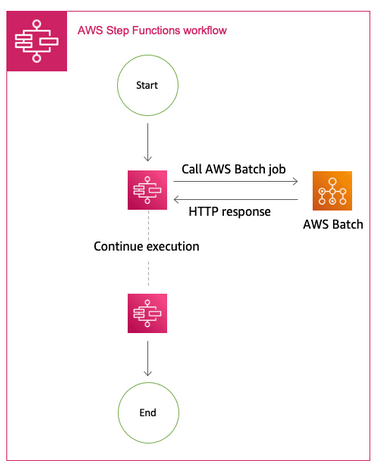

#### Run a Job (synchronous integration)

análogo à programação síncrona

é processada de modo que cada State é executado para então dar sequência na execução do próximo State definido

neste modelo, o Workflow contém um State que faz a **invocação de um AWS Batch Job e a continuidade de execução do Workflow depende da finalização deste AWS Batch Job**

para usar no modo síncrono devemos usar o sufixo no field "Resource" **.sync**

```json
"Manage Batch task": {
  "Type": "Task",
  "Resource": "arn:aws:states:::batch:submitJob.sync",
  "Parameters": {
    "JobDefinition": "arn:aws:batch:us-east-2:123456789012:job-definition/testJobDefinition",
    "JobName": "testJob",
    "JobQueue": "arn:aws:batch:us-east-2:123456789012:job-queue/testQueue"
  },
  "Next": "NEXT_STATE"
}
```

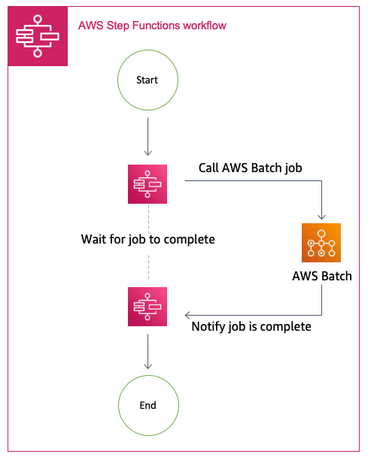

#### Wait for a Callback with the Task Token (callback)

tipico em situações onde se necessita de intervenção de ação humana

**o State faz um Request de um Token a outro State e, ao esse segundo gerar o Token e enviar ao primeiro State, o Workflow segue seu curso de execução**

faz uma pausa no Workflow até que um Token de tarefa seja retornado

necessário usar o sufixo no field "Resource" **.waitForTaskToken**

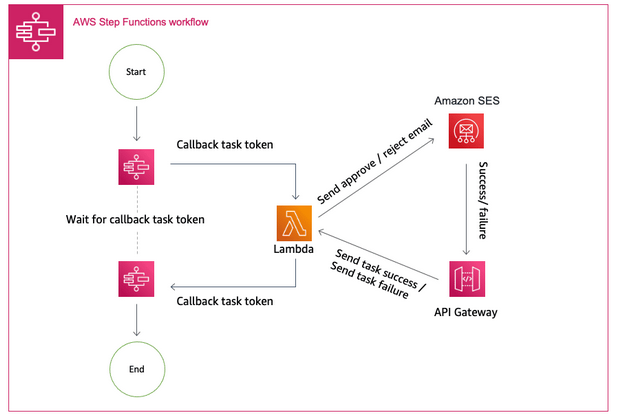

```json
"Send message to SQS": {
  "Type": "Task",
  "Resource": "arn:aws:states:::sqs:sendMessage.waitForTaskToken",
  "Parameters": {
    "QueueUrl": "https://sqs.us-east-2.amazonaws.com/123456789012/myQueue",
    "MessageBody": {
        "Message": "Hello from Step Functions!",
        "TaskToken.$": "$$.Task.Token"
     }
  },
  "Next": "NEXT_STATE"
}
```

# Monitoramento

antes de tudo é necessário traçar um plano do que se deseja observar. isso pode ser feito respondendo as seguintes perguntas:

+ quais são as metas da observação?

+ quais recursos serão monitorados?

+ quão frequente deve ser feito este monitoramento?

+ quais ferramentas de monitoramento serão utilizadas?

+ quem irá performar as tasks de monitoramento?

+ quem deve ser notificado em casos de falhas?

**por padrão Standard Workflows armazenam historico de execução de 90 dias, para maior rastreio outro serviço deve ser utilizado em conjunto**

**Express Workflows NÃO armazenam historico de execução dentro de StepFunctions, necessitando assim de um outro serviço**

## Serviços comuns de monitoramento

+ CloudWatch

+ CloudTrail

+ EventBridge

+ X-Ray